In [ ]:
# === SSC bootstrap cell (no borrar) ===
import os, sys, pathlib
BASE = "/content/drive/MyDrive/SSC"
os.environ["SSC_ROOT"] = BASE
os.environ["SSC_CACHE_DIR"] = f"{BASE}/.ssc_cache"
pathlib.Path(os.environ["SSC_CACHE_DIR"]).mkdir(parents=True, exist_ok=True)
sys.path.insert(0, BASE)

from ssc_pipeline.ssc_pipeline import run as ssc_update
ssc_update()  # refresca /content/drive/MyDrive/SSC/main.csv

import pandas as pd
df = pd.read_csv(f"{BASE}/main.csv")
print("main.csv cargado desde:", f"{BASE}/main.csv", "| Filas:", len(df))
df.head(3)


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

import re
import os
import time
import requests
import pandas as pd
from bs4 import BeautifulSoup

from google.colab import drive

In [58]:
# Mount Google Drive
drive.mount('/content/drive')

# Define the path inside Google Drive
base_dir = "/content/drive/My Drive/Winter Quarter 2025/STA 141C - Final Project/"
data_dir = base_dir + "Data/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
# Define the list of countries and data structure to store data
countries_df, countries = {}, ['China', 'Canada', 'Mexico', 'Japan', 'Germany']

# Get the data directories for each country
countries_dir = data_dir + 'ByCountry/'
for country in countries:

  # # Print progress
  # print("Loading Data for " + country + "...")

  # Define a dataframe and path for the data for the country
  df, country_dir = pd.DataFrame(), countries_dir + country + '/'

  # Iterate through each year and concatenate to the df
  for year in range(2000, 2023):

    # Append the new data to the existing dataframe
    new_df = pd.read_csv(country_dir + str(year) + '.csv')
    new_df['Year'] = year
    df = pd.concat([df, new_df], ignore_index = True)

    # # Print Progress
    # print("- Processed Data for " + str(year) + ".")

  # Add the dataframe to the dictionary
  countries_df[country] = df

# for country in countries: display(countries_df[country].head())

In [73]:
# Add a trade balance column
for country in countries:
  us_imports = countries_df[country]['Import (US$ Thousand)']
  us_exports = countries_df[country]['Export (US$ Thousand)']
  countries_df[country]['Trade Balance (US$ Thousand)'] = us_exports - us_imports

In [74]:
# Define the columns to convert from Thousands to Billions
columns_to_convert = [
    "Export (US$ Thousand)",
    "Import (US$ Thousand)",
    "Trade Balance (US$ Thousand)",
    "AHS SpecificDuty Imports (US$ Thousand)",
    "AHS Dutiable Imports (US$ Thousand)",
    "AHS Duty Free Imports (US$ Thousand)",
    "MFN SpecificDuty Imports (US$ Thousand)",
    "MFN Dutiable Imports (US$ Thousand)",
    "MFN Duty Free Imports (US$ Thousand)"
]

# Convert the columns to US$ Billions and rename them
for country in countries:
  for column in columns_to_convert:
    new_column_name = column.replace("(US$ Thousand)", "(US$ Billion)")
    countries_df[country][new_column_name] = countries_df[country][column] / 1e6
  countries_df[country].drop(columns=columns_to_convert, inplace=True)

# Example to show the changes for the first country
display(countries_df[countries[0]].head())

,Product Group,Export Product Share (%),Import Product Share (%),Revealed comparative advantage,World Growth (%),Country Growth (%),AHS Simple Average (%),AHS Weighted Average (%),AHS Total Tariff Lines,AHS Dutiable Tariff Lines Share (%),...,Year,Export (US$ Billion),Import (US$ Billion),Trade Balance (US$ Billion),AHS SpecificDuty Imports (US$ Billion),AHS Dutiable Imports (US$ Billion),AHS Duty Free Imports (US$ Billion),MFN SpecificDuty Imports (US$ Billion),MFN Dutiable Imports (US$ Billion),MFN Duty Free Imports (US$ Billion)
0,All Products,100.00,100.00,1.00,16.55,7.15,4.24,4.11,8202,59.40,...,2000,16.184679,100.012903,-83.828223,1.501149,62.928834,43.538381,1.501149,62.928834,43.538381
1,Capital goods,51.31,26.13,1.27,15.75,6.70,1.48,0.79,1489,44.33,...,2000,8.304745,26.136597,-17.831851,0.019164,10.335499,17.008952,0.019164,10.335499,17.008952
2,Consumer goods,8.19,64.13,0.73,22.41,10.64,5.29,5.55,3127,64.02,...,2000,1.325147,64.141853,-62.816706,0.943811,47.858993,21.810580,0.943811,47.858993,21.810580
3,Intermediate goods,19.98,7.02,0.74,11.13,-0.61,5.21,3.51,3080,68.08,...,2000,3.233540,7.023412,-3.789872,0.095138,3.909748,3.815256,0.095138,3.909748,3.815256
4,Raw materials,15.35,1.57,1.04,42.98,30.99,1.91,1.25,506,22.33,...,2000,2.483821,1.574956,0.908865,0.443036,0.824594,0.903593,0.443036,0.824594,0.903593


In [62]:
countries_df[countries[0]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Product Group                           483 non-null    object 
 1   Export Product Share (%)                483 non-null    float64
 2   Import Product Share (%)                483 non-null    float64
 3   Revealed comparative advantage          483 non-null    float64
 4   World Growth (%)                        483 non-null    float64
 5   Country Growth (%)                      483 non-null    float64
 6   AHS Simple Average (%)                  483 non-null    float64
 7   AHS Weighted Average (%)                483 non-null    float64
 8   AHS Total Tariff Lines                  483 non-null    int64  
 9   AHS Dutiable Tariff Lines Share (%)     483 non-null    float64
 10  AHS Duty Free Tariff Lines Share (%)    483 non-null    float6

In [79]:
trade_dir, trade_df = data_dir + 'USImpExp/', {}

for year in range(2000, 2023):
  file_path = trade_dir + str(year) + '.csv'
  trade_df[year] = pd.read_csv(file_path)

trade_df[2000]

,Partner Name,No Of exported HS6 digit Products,No Of imported HS6 digit Products,Export Share in Total Products (%),Import Share in Total Products (%),Trade Balance (US$ Thousand),Export (US$ Thousand),Import (US$ Thousand),Import Partner Share (%),Export Partner Share (%),...,MFN Dutiable Tariff Lines Share (%),MFN Duty Free Tariff Lines Share (%),MFN Specific Tariff Lines Share (%),MFN AVE Tariff Lines Share (%),MFN MaxRate (%),MFN MinRate (%),MFN SpecificDuty Imports (US$ Thousand),MFN Dutiable Imports (US$ Thousand),MFN Duty Free Imports (US$ Thousand),No Of Tariff Agreement
0,Afghanistan,58.0,18.0,1.18,0.37,7373.49,8154.38,780.89,0.00,0.00,...,60.00,30.00,0.00,10.00,20.20,0.0,0.00,104.58,756.03,1.0
1,Albania,148.0,27.0,3.01,0.55,13176.05,20943.32,7767.28,0.00,0.00,...,58.43,30.34,0.00,11.24,350.00,0.0,0.00,5932.10,935.33,1.0
2,Algeria,481.0,28.0,9.79,0.57,-1862456.68,861813.40,2724270.08,0.22,0.11,...,40.63,28.13,15.63,15.63,32.49,0.0,2531437.01,2563747.25,313433.51,NaN
3,Andorra,106.0,19.0,2.16,0.39,9843.93,10187.75,343.82,0.00,0.00,...,43.86,38.60,14.04,3.51,28.00,0.0,0.88,17.06,276.60,NaN
4,Angola,571.0,21.0,11.63,0.43,-3329989.47,225296.80,3555286.27,0.29,0.03,...,15.94,68.12,14.49,1.45,32.49,0.0,3744501.03,3744713.59,8525.60,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Venezuela,3490.0,879.0,71.06,17.87,-13073262.64,5549911.71,18623174.35,1.53,0.71,...,57.63,34.65,1.22,6.49,350.00,0.0,17179977.32,18446589.87,1007002.08,2.0
213,Vietnam,1156.0,560.0,23.54,11.38,-453815.42,367615.05,821430.46,0.07,0.05,...,63.67,23.81,1.80,10.72,94.63,0.0,96048.56,385293.71,488587.39,1.0
214,Yemen,401.0,22.0,8.17,0.45,-66188.15,189427.53,255615.68,0.02,0.02,...,43.18,40.91,6.82,9.09,10.30,0.0,254674.55,254839.08,4785.50,2.0
215,Zambia,182.0,38.0,3.71,0.77,1336.46,19063.41,17726.95,0.00,0.00,...,45.22,41.74,0.00,13.04,350.00,0.0,0.00,14308.79,2677.34,2.0


In [80]:
# prompt: Convert all the columns that have '(US$ Thousand)' in trade_df and convert them to (US$ Billion), renaming and performing numerical computations.

# Define the columns to convert from Thousands to Billions in trade_df
columns_to_convert_trade = [col for col in trade_df[2000].columns if '(US$ Thousand)' in col]

# Convert the columns to US$ Billions and rename them in trade_df
for year in range(2000, 2023):
    for column in columns_to_convert_trade:
        new_column_name = column.replace("(US$ Thousand)", "(US$ Billion)")
        trade_df[year][new_column_name] = trade_df[year][column] / 1e6
    trade_df[year].drop(columns=columns_to_convert_trade, inplace=True)

# Example to show the changes for the year 2000 in trade_df
display(trade_df[2000].head())

,Partner Name,No Of exported HS6 digit Products,No Of imported HS6 digit Products,Export Share in Total Products (%),Import Share in Total Products (%),Import Partner Share (%),Export Partner Share (%),AHS Simple Average (%),AHS Weighted Average (%),AHS Total Tariff Lines,...,No Of Tariff Agreement,Trade Balance (US$ Billion),Export (US$ Billion),Import (US$ Billion),AHS SpecificDuty Imports(US$ Billion),AHS Dutiable Imports (US$ Billion),AHS Duty Free Imports (US$ Billion),MFN SpecificDuty Imports (US$ Billion),MFN Dutiable Imports (US$ Billion),MFN Duty Free Imports (US$ Billion)
0,Afghanistan,58.0,18.0,1.18,0.37,0.00,0.00,29.65,4.90,30.0,...,1.0,0.007373,0.008154,0.000781,0.000000e+00,0.000137,0.000723,0.000000e+00,0.000105,0.000756
1,Albania,148.0,27.0,3.01,0.55,0.00,0.00,7.04,16.32,89.0,...,1.0,0.013176,0.020943,0.007767,0.000000e+00,0.003534,0.003334,0.000000e+00,0.005932,0.000935
2,Algeria,481.0,28.0,9.79,0.57,0.22,0.11,2.02,13.31,64.0,...,NaN,-1.862457,0.861813,2.724270,2.531437e+00,2.563747,0.313434,2.531437e+00,2.563747,0.313434
3,Andorra,106.0,19.0,2.16,0.39,0.00,0.00,4.78,0.38,57.0,...,NaN,0.009844,0.010188,0.000344,8.800000e-07,0.000017,0.000277,8.800000e-07,0.000017,0.000277
4,Angola,571.0,21.0,11.63,0.43,0.29,0.03,0.00,0.00,69.0,...,2.0,-3.329989,0.225297,3.555286,0.000000e+00,0.000000,3.753239,3.744501e+00,3.744714,0.008526


In [81]:

trade_df[2022].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Partner Name                            223 non-null    object 
 1   No Of exported HS6 digit Products       221 non-null    float64
 2   No Of imported HS6 digit Products       222 non-null    float64
 3   Export Share in Total Products (%)      221 non-null    float64
 4   Import Share in Total Products (%)      222 non-null    float64
 5   Import Partner Share (%)                223 non-null    float64
 6   Export Partner Share (%)                222 non-null    float64
 7   AHS Simple Average (%)                  220 non-null    float64
 8   AHS Weighted Average (%)                220 non-null    float64
 9   AHS Total Tariff Lines                  220 non-null    float64
 10  AHS Dutiable Tariff Lines Share (%)     220 non-null    float6

In [82]:
# Identify columns to sum (monetary values, product counts, and tariff lines)
sum_columns = [
    "Export (US$ Billion)", "Import (US$ Billion)", "Trade Balance (US$ Billion)",
    "AHS SpecificDuty Imports(US$ Billion)", "AHS Dutiable Imports (US$ Billion)",
    "AHS Duty Free Imports (US$ Billion)", "MFN SpecificDuty Imports (US$ Billion)",
    "MFN Dutiable Imports (US$ Billion)", "MFN Duty Free Imports (US$ Billion)",
    "No Of exported HS6 digit Products", "No Of imported HS6 digit Products",
    "AHS Total Tariff Lines", "MFN Total Tariff Lines",
    "Import Partner Share (%)", "Export Partner Share (%)",
]

# Identify columns to average (percentages)
avg_columns = [
    "Export Share in Total Products (%)", "Import Share in Total Products (%)",
    "AHS Simple Average (%)", "AHS Weighted Average (%)", "AHS Dutiable Tariff Lines Share (%)",
    "AHS Duty Free Tariff Lines Share (%)", "AHS Specific Tariff Lines Share (%)",
    "AHS AVE Tariff Lines Share (%)", "AHS MaxRate (%)", "AHS MinRate (%)",
    "MFN Simple Average (%)", "MFN Weighted Average (%)", "MFN Dutiable Tariff Lines Share (%)",
    "MFN Duty Free Tariff Lines Share (%)", "MFN Specific Tariff Lines Share (%)",
    "MFN AVE Tariff Lines Share (%)", "MFN MaxRate (%)", "MFN MinRate (%)"
]

for year in range(2000, 2023):

  # Compute aggregated values
  all_countries_data = {}
  all_countries_data["Partner Name"] = "All Countries"

  # Print columns
  # print(trade_df[year].columns)

  # Sum appropriate columns
  for col in sum_columns: all_countries_data[col] = trade_df[year][col].sum(skipna=True)

  # Average appropriate columns
  for col in avg_columns: all_countries_data[col] = trade_df[year][col].mean(skipna=True)

  # Handle "No Of Tariff Agreement" (take max, assuming agreements aren't cumulative)
  all_countries_data["No Of Tariff Agreement"] = trade_df[year]["No Of Tariff Agreement"].max()

  # Append the new row to the DataFrame
  df = pd.DataFrame([all_countries_data])
  trade_df[year] = pd.concat([trade_df[year], df], ignore_index=True)

trade_df[2022]

,Partner Name,No Of exported HS6 digit Products,No Of imported HS6 digit Products,Export Share in Total Products (%),Import Share in Total Products (%),Import Partner Share (%),Export Partner Share (%),AHS Simple Average (%),AHS Weighted Average (%),AHS Total Tariff Lines,...,No Of Tariff Agreement,Trade Balance (US$ Billion),Export (US$ Billion),Import (US$ Billion),AHS SpecificDuty Imports(US$ Billion),AHS Dutiable Imports (US$ Billion),AHS Duty Free Imports (US$ Billion),MFN SpecificDuty Imports (US$ Billion),MFN Dutiable Imports (US$ Billion),MFN Duty Free Imports (US$ Billion)
0,Afghanistan,81.0,153.0,1.80000,3.390000,0.00,0.00,4.690000,1.510000,592.0,...,2.0,-0.002060,0.021747,0.023806,0.000000,0.007446,0.014511,0.000000,0.015964,0.005993
1,Albania,292.0,334.0,6.48000,7.400000,0.00,0.01,6.220000,2.070000,1281.0,...,1.0,-0.034291,0.117843,0.152134,0.000000,0.025451,0.123441,0.000000,0.141981,0.006911
2,Algeria,653.0,104.0,14.50000,2.310000,0.09,0.06,3.600000,0.880000,414.0,...,1.0,-1.965812,1.200594,3.166407,0.000000,2.510185,0.640553,0.000000,2.519008,0.631731
3,Andorra,51.0,69.0,1.13000,1.530000,0.00,0.00,3.600000,0.680000,179.0,...,NaN,-0.006448,0.003511,0.009959,0.000000,0.004036,0.005091,0.000000,0.004036,0.005091
4,Angola,919.0,25.0,20.40000,0.550000,0.05,0.03,0.000000,0.000000,46.0,...,3.0,-0.988237,0.651455,1.639692,0.000000,0.111543,1.522891,0.000000,1.500623,0.133811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Wallis and Futura Isl.,4.0,6.0,0.09000,0.130000,0.00,0.00,0.470000,0.120000,21.0,...,1.0,-0.000030,0.000086,0.000116,0.000000,0.000006,0.000106,0.000000,0.000019,0.000093
220,Yemen,240.0,107.0,5.33000,2.370000,0.00,0.02,3.060000,0.170000,330.0,...,2.0,0.350063,0.381998,0.031936,0.000000,0.000823,0.030488,0.000000,0.015193,0.016117
221,Zambia,384.0,65.0,8.53000,1.440000,0.00,0.01,0.880000,0.270000,240.0,...,3.0,-0.003587,0.135315,0.138902,0.000000,0.000782,0.135242,0.000000,0.040572,0.095452
222,Zimbabwe,289.0,85.0,6.42000,1.880000,0.00,0.00,3.470000,13.090000,286.0,...,1.0,-0.048654,0.041117,0.089771,0.000000,0.030939,0.057235,0.000000,0.079425,0.008750


In [83]:
# prompt: Create a new dataframe called global_trade_df and iterate through the trade_df appending the 'All Countries' row of each year into the new df, setting the index as the year

global_trade_df = pd.DataFrame()

for year in range(2000, 2023):
  # Find the row where 'Partner Name' is 'All Countries'
  all_countries_row = trade_df[year][trade_df[year]['Partner Name'] == 'All Countries']

  # Append the row to the global DataFrame
  global_trade_df = pd.concat([global_trade_df, all_countries_row], ignore_index=True)

# Set the index to the year
global_trade_df.index = range(2000, 2023)
global_trade_df


,Partner Name,No Of exported HS6 digit Products,No Of imported HS6 digit Products,Export Share in Total Products (%),Import Share in Total Products (%),Import Partner Share (%),Export Partner Share (%),AHS Simple Average (%),AHS Weighted Average (%),AHS Total Tariff Lines,...,No Of Tariff Agreement,Trade Balance (US$ Billion),Export (US$ Billion),Import (US$ Billion),AHS SpecificDuty Imports(US$ Billion),AHS Dutiable Imports (US$ Billion),AHS Duty Free Imports (US$ Billion),MFN SpecificDuty Imports (US$ Billion),MFN Dutiable Imports (US$ Billion),MFN Duty Free Imports (US$ Billion)
2000,All Countries,225881.0,117490.0,21.293935,11.057500,99.92,99.86,4.351111,4.394722,302930.0,...,3.0,-436.427494,781.505480,1217.932974,105.614777,490.444816,677.515828,128.379388,744.459655,423.500989
2001,All Countries,227307.0,117841.0,21.333825,10.975642,99.94,99.85,4.385622,4.870783,304773.0,...,3.0,-412.090877,728.809279,1140.900159,80.161259,450.515283,646.815079,111.886920,705.662532,391.667830
2002,All Countries,223225.0,119887.0,21.356481,11.384286,99.98,99.82,4.405880,4.483333,323982.0,...,4.0,-507.233266,692.862548,1200.095834,81.851595,474.200902,646.126789,111.851212,728.889272,391.438419
2003,All Countries,227504.0,121844.0,21.561835,11.533853,99.92,99.93,3.927064,4.014358,324502.0,...,4.0,-578.290839,724.542669,1302.833508,65.600208,484.135436,740.803611,143.334714,795.215802,429.723245
2004,All Countries,232770.0,123981.0,22.092982,11.743211,99.96,99.97,3.890876,3.756359,329717.0,...,4.0,-710.695812,814.608405,1525.304217,83.171950,534.919891,904.595319,192.178870,896.302753,543.212456
2005,All Countries,238401.0,126299.0,22.542694,11.910639,100.02,99.92,3.819769,3.751389,334939.0,...,4.0,-834.024043,900.825099,1734.849142,139.773053,634.025797,1007.743557,263.075909,1032.181874,609.587480
2006,All Countries,245586.0,127922.0,23.198265,12.045890,99.93,99.89,3.056944,2.815370,339317.0,...,4.0,-882.092254,1036.904841,1918.997094,132.056762,668.946207,1152.535453,313.522008,1156.087953,665.393706
2007,All Countries,250522.0,124691.0,24.879636,12.366864,99.96,99.87,2.667580,2.250685,294577.0,...,4.0,-855.021236,1162.099541,2017.120776,147.668972,735.925540,1181.586141,344.801612,1100.220632,817.291049
2008,All Countries,262879.0,122176.0,25.948182,12.112455,99.91,99.89,2.762785,2.337945,333382.0,...,4.0,-865.181058,1299.652973,2164.834031,201.697780,748.924476,1315.174650,469.776050,1321.258014,742.841112
2009,All Countries,256097.0,117125.0,25.432648,11.682329,99.94,99.92,2.479587,2.283624,321489.0,...,4.0,-545.425650,1056.470165,1601.895815,137.579986,568.888307,949.181326,267.618965,934.025709,584.043925


In [84]:
countries_df['China']

,Product Group,Export Product Share (%),Import Product Share (%),Revealed comparative advantage,World Growth (%),Country Growth (%),AHS Simple Average (%),AHS Weighted Average (%),AHS Total Tariff Lines,AHS Dutiable Tariff Lines Share (%),...,Year,Export (US$ Billion),Import (US$ Billion),Trade Balance (US$ Billion),AHS SpecificDuty Imports (US$ Billion),AHS Dutiable Imports (US$ Billion),AHS Duty Free Imports (US$ Billion),MFN SpecificDuty Imports (US$ Billion),MFN Dutiable Imports (US$ Billion),MFN Duty Free Imports (US$ Billion)
0,All Products,100.00,100.00,1.00,16.55,7.15,4.24,4.11,8202,59.40,...,2000,16.184679,100.012903,-83.828223,1.501149,62.928834,43.538381,1.501149,62.928834,43.538381
1,Capital goods,51.31,26.13,1.27,15.75,6.70,1.48,0.79,1489,44.33,...,2000,8.304745,26.136597,-17.831851,0.019164,10.335499,17.008952,0.019164,10.335499,17.008952
2,Consumer goods,8.19,64.13,0.73,22.41,10.64,5.29,5.55,3127,64.02,...,2000,1.325147,64.141853,-62.816706,0.943811,47.858993,21.810580,0.943811,47.858993,21.810580
3,Intermediate goods,19.98,7.02,0.74,11.13,-0.61,5.21,3.51,3080,68.08,...,2000,3.233540,7.023412,-3.789872,0.095138,3.909748,3.815256,0.095138,3.909748,3.815256
4,Raw materials,15.35,1.57,1.04,42.98,30.99,1.91,1.25,506,22.33,...,2000,2.483821,1.574956,0.908865,0.443036,0.824594,0.903593,0.443036,0.824594,0.903593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,Stone and Glass,2.35,1.78,0.31,12.83,-5.47,3.25,5.83,368,62.77,...,2022,3.612494,10.272088,-6.659594,0.000000,9.256150,0.812129,0.000000,9.256150,0.812129
479,Textiles and Clothing,2.34,6.60,1.75,-5.73,28.50,8.97,10.60,1549,82.12,...,2022,3.603716,37.996946,-34.393229,0.000000,35.301366,0.562708,0.000000,35.301366,0.562708
480,Transportation,4.79,3.80,2.48,-3.81,-2.40,2.31,1.66,214,50.00,...,2022,7.367559,21.902448,-14.534889,0.000000,16.787263,2.763601,0.000000,16.787263,2.763601
481,Vegetable,17.71,0.31,3.32,4.51,2.98,3.16,2.30,463,33.26,...,2022,27.237354,1.795275,25.442080,0.000000,1.490366,0.216416,0.000000,1.490366,0.216416


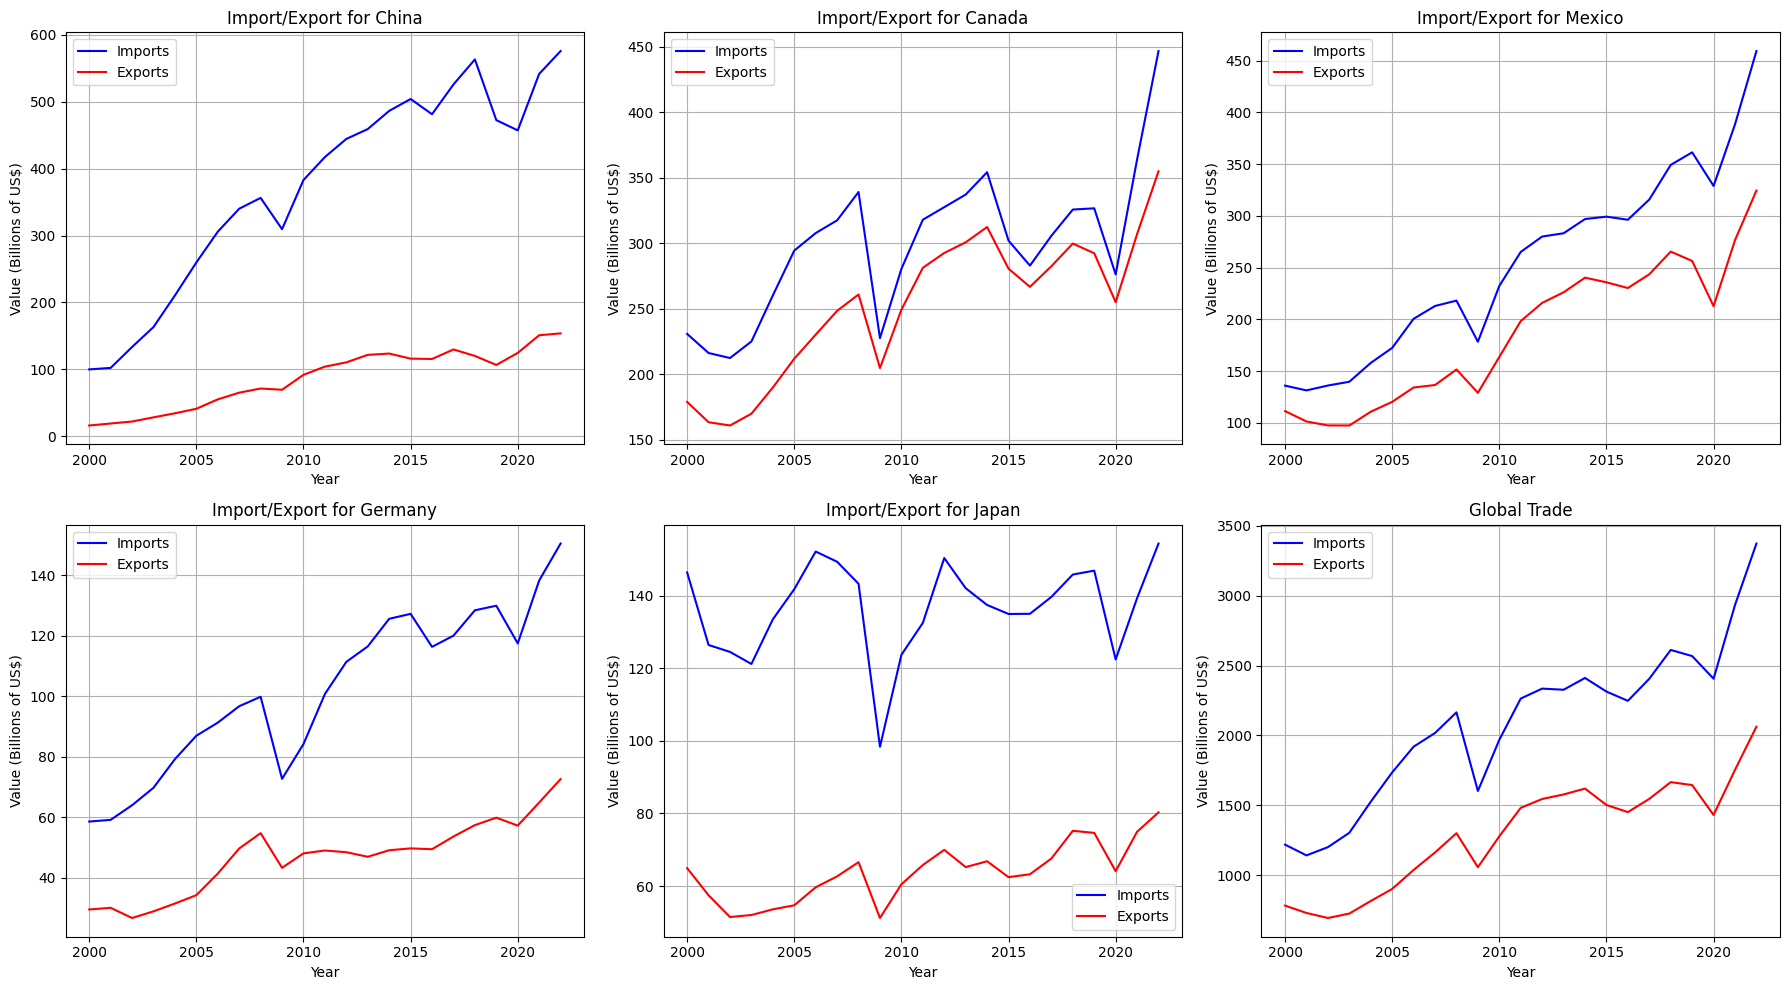

In [86]:
# prompt: Make a 2x3 grid of plots. The six subplots should be Import/Export over the years for China, Canada, Mexico, Germany, Japan, and Global (from global_trade_df). For each subplot, plot the years as x and the value in billions as y. Make the line for imports as blue and exports as red

# Assuming global_trade_df and countries_df are defined as in the provided code

import matplotlib.pyplot as plt

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Define the countries and global data
countries = ['China', 'Canada', 'Mexico', 'Germany', 'Japan']
all_countries = ['Global']


# Iterate through each subplot
for i, country in enumerate(countries + all_countries):
  # Determine the subplot position
  row = i // 3
  col = i % 3
  ax = axes[row, col]

  if country == 'Global':
      # Plot for Global trade
      ax.plot(global_trade_df.index, global_trade_df['Import (US$ Billion)'], label='Imports', color='blue')
      ax.plot(global_trade_df.index, global_trade_df['Export (US$ Billion)'], label='Exports', color='red')
      ax.set_title(f'Impot/Export for All Countries')

  else:
    # Plot for individual countries
    country_df = countries_df[country][countries_df[country]['Product Group'] == 'All Products']
    ax.plot(country_df['Year'], country_df['Import (US$ Billion)'], label='Imports', color='blue')
    ax.plot(country_df['Year'], country_df['Export (US$ Billion)'], label='Exports', color='red')
    ax.set_title(f'Import/Export for {country}')

  ax.set_xlabel('Year')
  ax.set_ylabel('Value (Billions of US$)')
  ax.legend()
  ax.grid(True)

# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.show()


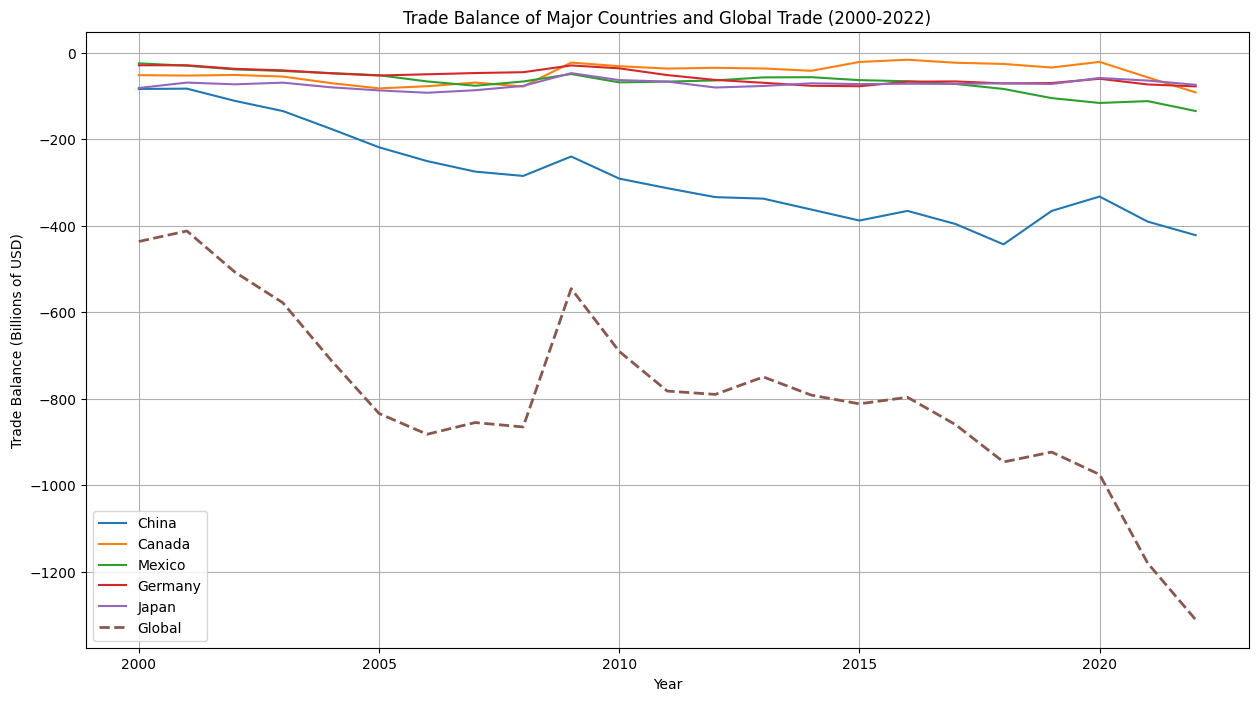

In [87]:
# prompt: Now make a single plot with 6 lines. The x axis should be years, the y axis should be values in billlions of USD. Each line should represent the trade balance for each of the 5 major countries, plus the global trade

# Assuming global_trade_df and countries_df are defined as in the provided code

plt.figure(figsize=(15, 8))  # Adjust figure size for better visibility

# Plot each country's trade balance
for country in countries:
    country_df = countries_df[country][countries_df[country]['Product Group'] == 'All Products']
    plt.plot(country_df['Year'], country_df['Trade Balance (US$ Billion)'], label=country)

# Plot the global trade balance
plt.plot(global_trade_df.index, global_trade_df['Trade Balance (US$ Billion)'], label='Global', linestyle='--', linewidth=2)


plt.xlabel('Year')
plt.ylabel('Trade Balance (Billions of USD)')
plt.title('Trade Balance of Major Countries and Global Trade (2000-2022)')
plt.legend()
plt.grid(True)
plt.show()
